# Test Model

In [2]:
!git clone https://github.com/Sh41lD4n1n/FederatedLearning
! cd FederatedLearning
!git checkout CNN_model

fatal: destination path 'FederatedLearning' already exists and is not an empty directory.
fatal: not a git repository (or any of the parent directories): .git


In [ ]:
!pip install tensorboard
#!tensorboard --logdir=runs
%load_ext tensorboard
%tensorboard --logdir runs

In [1]:
import os
os.chdir("FederatedLearning")
!git checkout CNN_model

In [2]:
!pwd

/content/FederatedLearning


In [ ]:
import os

os.chdir("./Models/CNN_model")
#!ls
from Model import Model,Optimizer_SGD
from Data import Data

os.chdir("../..")
!ls

from Models.MatrixScheduler.MatrixScheduler_identical import MatrixScheduler_identical
from Models.MatrixScheduler.MatrixScheduler_Uniform import MatrixScheduler_Uniform
from Models.FederatedLearning.Server import server
from Models.StatisticClass import Statistic,array_mean_object

#os.chdir("../Reports")
import matplotlib.pyplot as plt
import numpy as np
#!ls

### Model

In [2]:
d = Data(split = "noSplit",n_workers=1)

Files already downloaded and verified
Files already downloaded and verified
1
1


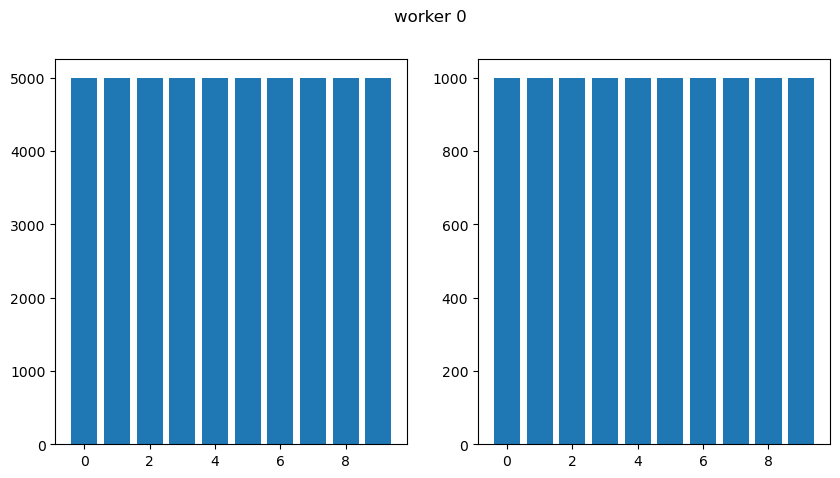

In [3]:
train,test = d.get_data()

plt.figure(figsize=(10, 5))
val,counts = np.unique(train[0].targets,return_counts = True)
val1,counts1 = np.unique(test[0].targets,return_counts = True)

plt.subplot(121)
plt.bar(val,counts)
plt.subplot(122)
plt.bar(val1,counts1)
plt.suptitle("worker 0")
plt.show()

In [4]:
m = Model("Model")
trainloader = d.get_data_loaders()[0]['trainloader']
testloader = d.get_data_loaders()[0]['testloader']

m.run(epoch = 40,train_loader = trainloader,test_loader = testloader)

TypeError: SummaryWriter.add_hparams() missing 1 required positional argument: 'metric_dict'

56.929923847317696
0.8613


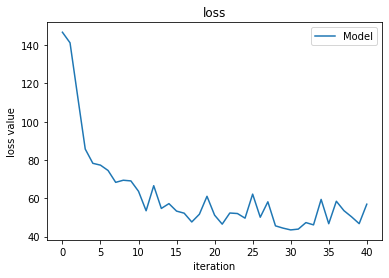

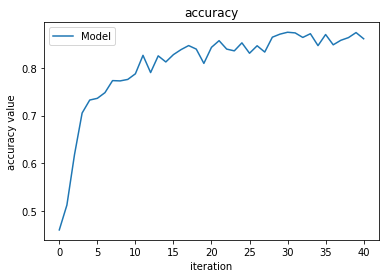

In [18]:
print(m.stat_collector.loss[-1])
print(m.stat_collector.accuracy[-1])
m.stat_collector.loss_plot()
m.stat_collector.acc_plot()

## Federated learning

### Identical split, running with update on each iteration

In [4]:
def model_creator():
    name = "FederatedModel"

    model = Model(name)
    
    opt = Optimizer_SGD(params=model.net.parameters())
    preconditioner = None
    scaller = None
    #model.set_optimizer(opt)
    #model.set_preconditioner(preconditioner)
    #model.set_scaller(scaller)
    return model

In [5]:
d = Data(split = "ident",n_workers=3)

Files already downloaded and verified
Files already downloaded and verified
1
1


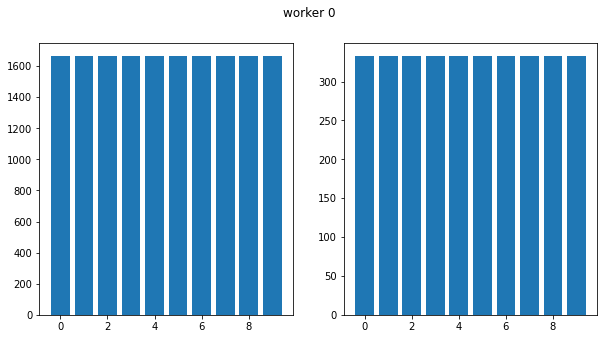

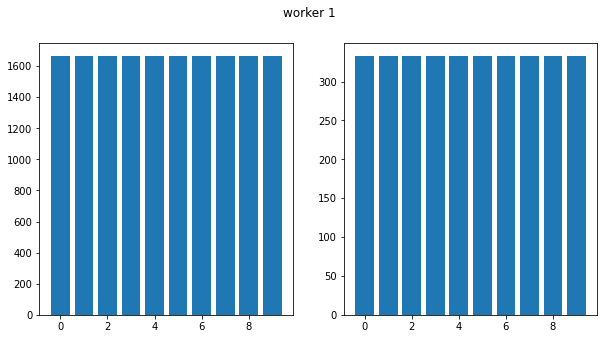

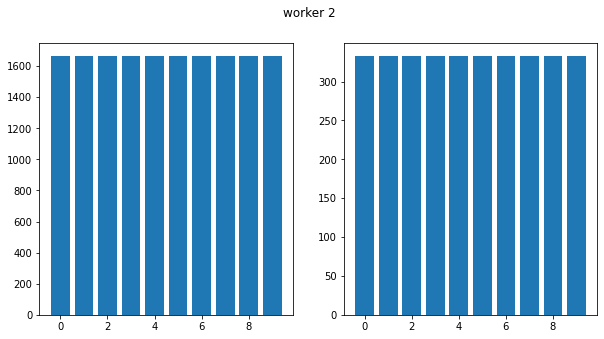

In [6]:
trains,tests = d.get_data()

for i,(train,test) in enumerate(zip(trains,tests)):
    plt.figure(figsize=(10, 5))

    val,counts = np.unique(train.indices,return_counts = True)
    val1,counts1 = np.unique(test.indices,return_counts = True)

    plt.subplot(121)
    plt.bar(val,counts)
    plt.subplot(122)
    plt.bar(val1,counts1)
    plt.suptitle(f"worker {i}")
    plt.show()

In [7]:
s = server(num_workers=3,data = d.get_data_loaders(),model_creator=model_creator)
s.run(n_iter=30,T=1)

 [=================================================>]  Step: 252ms | Tot: 15s447ms | Loss: 0.159 | Acc: 97.137% (16183/16660 131/131 
 [================================================>.]  Step: 118ms | Tot: 1s568ms | Loss: 3.817 | Acc: 20.000% (666/3330 34/34 
 [=================================================>]  Step: 38ms | Tot: 14s966ms | Loss: 0.154 | Acc: 97.701% (16277/16660 131/131 
 [================================================>.]  Step: 21ms | Tot: 1s498ms | Loss: 4.791 | Acc: 10.000% (333/3330 34/34 
 [=================================================>]  Step: 50ms | Tot: 15s352ms | Loss: 0.149 | Acc: 97.497% (16243/16660 131/131 
 [================================================>.]  Step: 33ms | Tot: 1s618ms | Loss: 4.907 | Acc: 20.000% (666/3330 34/34 


AttributeError: ignored

In [ ]:
print(s.workers[0].model.stat_collector.loss[-1])
print(s.workers[0].model.stat_collector.accuracy[-1])
s.workers[0].model.stat_collector.loss_plot()
s.workers[0].model.stat_collector.acc_plot()

### Identical split

In [ ]:
def model_creator():
    name = "FederatedModel_ident"
    #opt = Optimizer_SGD()
    preconditioner = None
    scaller = None

    model = Model(name)
    #model.set_optimizer(opt)
    #model.set_preconditioner(preconditioner)
    #model.set_scaller(scaller)
    return model

In [ ]:
d = Data(split = "ident",n_workers=3)

In [ ]:
trains,tests = d.get_data()

for i,(train,test) in enumerate(zip(trains,tests)):
    plt.figure(figsize=(10, 5))

    val,counts = np.unique(train.indices,return_counts = True)
    val1,counts1 = np.unique(test.indices,return_counts = True)

    plt.subplot(121)
    plt.bar(val,counts)
    plt.subplot(122)
    plt.bar(val1,counts1)
    plt.suptitle(f"worker {i}")
    plt.show()

In [ ]:
s = server(num_workers=3,data = d.get_data_loaders(),model_creator=model_creator)
s.run(n_iter=30,T=5)

In [ ]:
stat_collectors = [w.model.stat_collector for w in s.workers]
stat_collector = array_mean_object(stat_collectors,"ident")

In [ ]:
print(stat_collector.loss[-1])
print(stat_collector.accuracy[-1])
stat_collector.loss_plot()
stat_collector.acc_plot()

## Heterogenious

In [ ]:
d = Data(split = "het",n_workers=3)

In [ ]:
trains,tests = d.get_data()

for i,(train,test) in enumerate(zip(trains,tests)):
    plt.figure(figsize=(10, 5))

    val,counts = np.unique(train.indices,return_counts = True)
    val1,counts1 = np.unique(test.indices,return_counts = True)

    plt.subplot(121)
    plt.bar(val,counts)
    plt.subplot(122)
    plt.bar(val1,counts1)
    plt.suptitle(f"worker {i}")
    plt.show()

In [ ]:
len(trains[0]),len(trains[1]),len(trains[2]),len(trains[0])+len(trains[1])+len(trains[2])

In [ ]:
len(tests[0]),len(tests[1]),len(tests[2]),len(tests[0])+len(tests[1])+len(tests[2])

In [ ]:
s = server(num_workers=3,data = d.get_data_loaders(),model_creator=model_creator)
s.run(n_iter=30,T=5)

## Launch tensorboard

In [ ]:
%tensorboard --logdir logs

### Scaller ident

In [ ]:
def model_creator():
    name = "FederatedModel_ident"
    opt = Optimizer_SGD()
    preconditioner = None
    scaller = MatrixScheduler_Uniform(0.1,2,change_mode = MatrixScheduler_Uniform.change_on_each_global_update)

    model = Model(name)
    #model.set_optimizer(opt)
    #model.set_preconditioner(preconditioner)
    model.set_scaller(scaller)
    return model

In [ ]:
d = Data(split = "ident",n_workers=3)

Files already downloaded and verified
Files already downloaded and verified
1
1


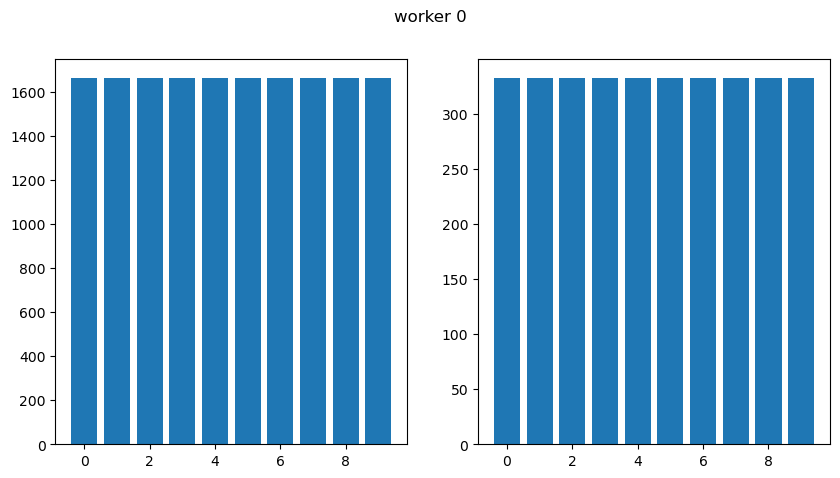

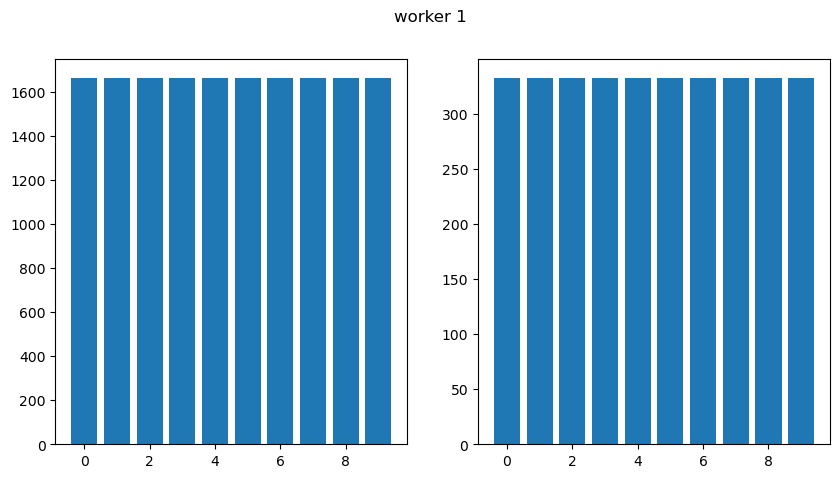

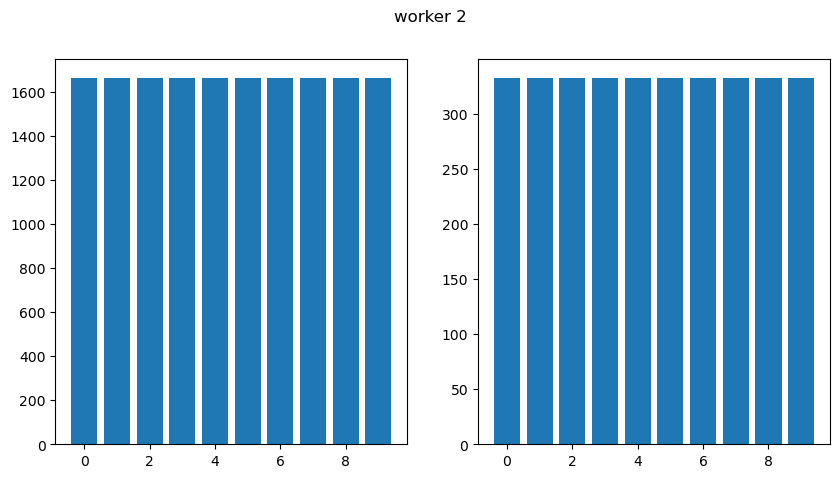

In [ ]:
trains,tests = d.get_data()

for i,(train,test) in enumerate(zip(trains,tests)):
    plt.figure(figsize=(10, 5))

    val,counts = np.unique(train.indices,return_counts = True)
    val1,counts1 = np.unique(test.indices,return_counts = True)

    plt.subplot(121)
    plt.bar(val,counts)
    plt.subplot(122)
    plt.bar(val1,counts1)
    plt.suptitle(f"worker {i}")
    plt.show()

In [ ]:
s = server(num_workers=3,data = d.get_data_loaders(),model_creator=model_creator)
s.run(n_iter=200,T=20)